In [107]:
from tensorflow import keras
from tensorflow.keras import Sequential, Model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [35]:
N = 7500
num_classes = 10

In [31]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = (X_train/255).reshape(-1, 28**2)[:N, :]
X_test = (X_test/255).reshape(-1, 28**2)[:N, :]
y_train = y_train[:N]
y_test = y_test[:N]
R = LogisticRegression()

R.fit(X_train, y_train)
y_p = R.predict(X_test)
print(np.sum(y_p == y_test)/N)

0.8229333333333333


In [32]:
R = RandomForestClassifier(n_estimators=300, oob_score=True)
R.fit(X_train, y_train)
y_p = R.predict(X_test)
print(np.sum(y_p == y_test)/N)
print(R.oob_score_)

0.8486666666666667
0.8569333333333333


In [ ]:
nn1 = Sequential()
nn1.add(Dense(num_classes, input_dim=28**2, activation="softmax"))

nn1.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
nn1.summary()

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = (X_train/255).reshape(-1, 28**2)
X_test = (X_test/255).reshape(-1, 28**2)
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

nn1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

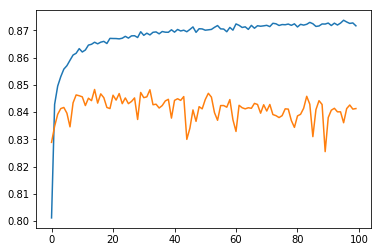

In [45]:
train_accuracy = nn1.history.history["accuracy"]
test_accuracy = nn1.history.history["val_accuracy"]
plt.plot(range(100), train_accuracy, range(100), test_accuracy)

In [47]:
nn2 = Sequential()
nn2.add(Dense(512, input_dim=28**2, activation="relu"))
nn2.add(Dense(num_classes, activation="softmax"))

nn2.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
nn2.summary()

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = (X_train/255).reshape(-1, 28**2)
X_test = (X_test/255).reshape(-1, 28**2)
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

nn2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 94us/sample - loss: 0.4939 - accuracy: 0.8250 - val_loss: 0.4074 - val_accuracy: 0.8538
Epoch 2/100
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3788 - accuracy: 0.8663 - val_loss: 0.3934 - val_accuracy: 0.8675
Epoch 3/100
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3562 - accuracy: 0.8759 - val_loss: 0.4519 - val_accuracy: 0.8587
Epoch 4/10

Epoch 51/100
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2061 - accuracy: 0.9510 - val_loss: 0.9888 - val_accuracy: 0.8822
Epoch 52/100
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2062 - accuracy: 0.9509 - val_loss: 1.1248 - val_accuracy: 0.8840
Epoch 53/100
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2014 - accuracy: 0.9523 - val_loss: 1.1136 - val_accuracy: 0.8824
Epoch 54/100
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2038 - accuracy: 0.9533 - val_loss: 1.2235 - val_accuracy: 0.8772
Epoch 55/100
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2015 - accuracy: 0.9529 - val_loss: 1.1647 - val_accuracy: 0.8780
Epoch 56/100
60000/60000 [==============================] - 6s 96us/sample - loss: 0.1894 - accuracy: 0.9536 - val_loss: 1.1072 - val_accuracy: 0.8856
Epoch 57/100
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2028 - a

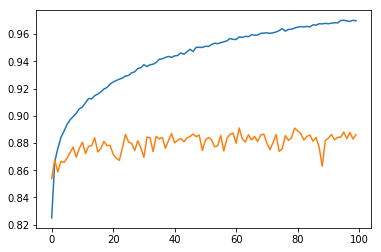

In [48]:
train_accuracy = nn2.history.history["accuracy"]
test_accuracy = nn2.history.history["val_accuracy"]
plt.plot(range(100), train_accuracy, range(100), test_accuracy)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4945 - accuracy: 0.8253 - val_loss: 0.4161 - val_accuracy: 0.8508
Epoch 2/100
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3729 - accuracy: 0.8672 - val_loss: 0.3815 - val_accuracy: 0.8682
Epoch 3/100
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3463 - accuracy: 0.8791 - val_loss: 0.3994 - val_accuracy: 0.8699
Epoch 4/1

Epoch 51/100
60000/60000 [==============================] - 4s 62us/sample - loss: 0.1759 - accuracy: 0.9519 - val_loss: 0.9752 - val_accuracy: 0.8752
Epoch 52/100
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1732 - accuracy: 0.9523 - val_loss: 0.9351 - val_accuracy: 0.8797
Epoch 53/100
60000/60000 [==============================] - 4s 59us/sample - loss: 0.1707 - accuracy: 0.9541 - val_loss: 0.9626 - val_accuracy: 0.8817
Epoch 54/100
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1685 - accuracy: 0.9545 - val_loss: 0.9772 - val_accuracy: 0.8838
Epoch 55/100
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1668 - accuracy: 0.9540 - val_loss: 1.0531 - val_accuracy: 0.8758
Epoch 56/100
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1688 - accuracy: 0.9556 - val_loss: 1.0499 - val_accuracy: 0.8832
Epoch 57/100
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1647 - ac

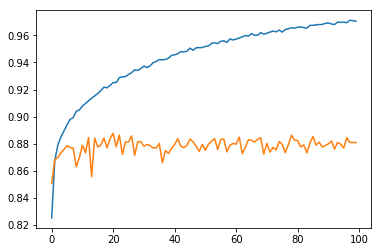

In [49]:
nn3 = Sequential()
nn3.add(Dense(256, input_dim=28**2, activation="relu"))
nn3.add(Dense(num_classes, activation="softmax"))

nn3.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
nn3.summary()

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = (X_train/255).reshape(-1, 28**2)
X_test = (X_test/255).reshape(-1, 28**2)
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

nn3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

train_accuracy = nn3.history.history["accuracy"]
test_accuracy = nn3.history.history["val_accuracy"]
plt.plot(range(100), train_accuracy, range(100), test_accuracy)

In [51]:
nn.save("nn1.h5")
nn2.save("nn2.h5")
nn3.save("nn3.h5")

In [ ]:
rng = range(100)
plt.plot(rng, nn["accuracy", range(100), test_accuracy)

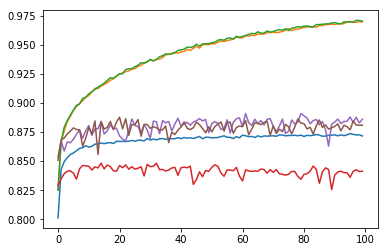

In [54]:
acc1 = nn.history.history["accuracy"]
vacc1 = nn.history.history["val_accuracy"]
acc2 = nn2.history.history["accuracy"]
vacc2 = nn2.history.history["val_accuracy"]
acc3 = nn3.history.history["accuracy"]
vacc3 = nn3.history.history["val_accuracy"]
r = range(100)
plt.plot(r, acc1, r, acc2, r, acc3, r, vacc1, r, vacc2, r, vacc3)

In [55]:
nn4 = Sequential()
nn4.add(Dense(128, input_dim=28**2, activation="relu"))
nn4.add(Dense(num_classes, activation="softmax"))

nn4.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
nn4.summary()

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = (X_train/255).reshape(-1, 28**2)
X_test = (X_test/255).reshape(-1, 28**2)
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

nn4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

acc4 = nn4.history.history["accuracy"]
vacc4 = nn4.history.history["val_accuracy"]
plt.plot(range(100), acc4, range(100), vacc4)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 43us/sample - loss: 0.5087 - accuracy: 0.8212 - val_loss: 0.4060 - val_accuracy: 0.8550
Epoch 2/100
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3776 - accuracy: 0.8640 - val_loss: 0.3861 - val_accuracy: 0.8693
Epoch 3/100
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3476 - accuracy: 0.8767 - val_loss: 0.3980 - val_accuracy: 0.8548
Epoch 4/1

Epoch 51/100
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1691 - accuracy: 0.9479 - val_loss: 0.8564 - val_accuracy: 0.8784
Epoch 52/100
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1700 - accuracy: 0.9486 - val_loss: 0.8648 - val_accuracy: 0.8758
Epoch 53/100
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1659 - accuracy: 0.9490 - val_loss: 0.8582 - val_accuracy: 0.8762
Epoch 54/100
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1637 - accuracy: 0.9494 - val_loss: 0.9110 - val_accuracy: 0.8733
Epoch 55/100
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1617 - accuracy: 0.9506 - val_loss: 0.8341 - val_accuracy: 0.8756
Epoch 56/100
60000/60000 [==============================] - 2s 39us/sample - loss: 0.1630 - accuracy: 0.9506 - val_loss: 0.8924 - val_accuracy: 0.8789
Epoch 57/100
60000/60000 [==============================] - 2s 38us/sample - loss: 0.1632 - ac

NameError: name 'acc' is not defined

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 42us/sample - loss: 0.5118 - accuracy: 0.8201 - val_loss: 0.4331 - val_accuracy: 0.8430
Epoch 2/100
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3858 - accuracy: 0.8620 - val_loss: 0.3976 - val_accuracy: 0.8612
Epoch 3/100
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3545 - accuracy: 0.8730 - val_loss: 0.4050 - val_accuracy: 0.8578
Epoch 4/100

Epoch 51/100
60000/60000 [==============================] - 2s 36us/sample - loss: 0.1981 - accuracy: 0.9363 - val_loss: 0.6845 - val_accuracy: 0.8741
Epoch 52/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2015 - accuracy: 0.9360 - val_loss: 0.7544 - val_accuracy: 0.8685
Epoch 53/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1993 - accuracy: 0.9370 - val_loss: 0.6959 - val_accuracy: 0.8742
Epoch 54/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1961 - accuracy: 0.9370 - val_loss: 0.6947 - val_accuracy: 0.8703
Epoch 55/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1940 - accuracy: 0.9367 - val_loss: 0.7248 - val_accuracy: 0.8670
Epoch 56/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1933 - accuracy: 0.9385 - val_loss: 0.7250 - val_accuracy: 0.8662
Epoch 57/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1924 - ac

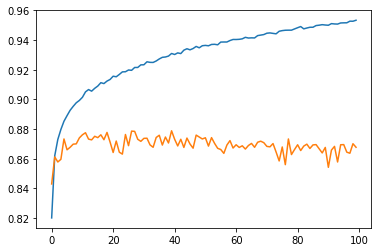

In [56]:
nn5 = Sequential()
nn5.add(Dense(64, input_dim=28**2, activation="relu"))
nn5.add(Dense(num_classes, activation="softmax"))

nn5.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
nn5.summary()

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = (X_train/255).reshape(-1, 28**2)
X_test = (X_test/255).reshape(-1, 28**2)
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

nn5.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

acc5 = nn5.history.history["accuracy"]
vacc5 = nn5.history.history["val_accuracy"]
plt.plot(range(100), acc5, range(100), vacc5)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 35us/sample - loss: 0.5502 - accuracy: 0.8096 - val_loss: 0.4739 - val_accuracy: 0.8330
Epoch 2/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.4242 - accuracy: 0.8486 - val_loss: 0.4333 - val_accuracy: 0.8476
Epoch 3/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3889 - accuracy: 0.8631 - val_loss: 0.4373 - val_accuracy: 0.8444
Epoch 4/100

60000/60000 [==============================] - 2s 36us/sample - loss: 0.2478 - accuracy: 0.9180 - val_loss: 0.5236 - val_accuracy: 0.8654
Epoch 51/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2451 - accuracy: 0.9181 - val_loss: 0.5395 - val_accuracy: 0.8690
Epoch 52/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2469 - accuracy: 0.9178 - val_loss: 0.5560 - val_accuracy: 0.8690
Epoch 53/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2454 - accuracy: 0.9195 - val_loss: 0.5453 - val_accuracy: 0.8641
Epoch 54/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2436 - accuracy: 0.9197 - val_loss: 0.5707 - val_accuracy: 0.8696
Epoch 55/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2421 - accuracy: 0.9197 - val_loss: 0.5621 - val_accuracy: 0.8676
Epoch 56/100
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2403 - accuracy: 0.920

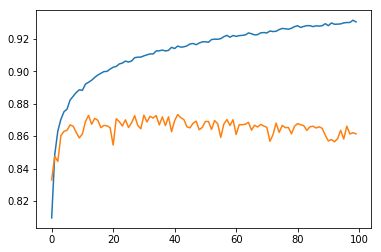

In [57]:
nn6 = Sequential()
nn6.add(Dense(32, input_dim=28**2, activation="relu"))
nn6.add(Dense(num_classes, activation="softmax"))

nn6.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
nn6.summary()

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = (X_train/255).reshape(-1, 28**2)
X_test = (X_test/255).reshape(-1, 28**2)
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

nn6.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

acc6 = nn6.history.history["accuracy"]
vacc6 = nn6.history.history["val_accuracy"]
plt.plot(range(100), acc6, range(100), vacc6)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 33us/sample - loss: 0.5953 - accuracy: 0.7980 - val_loss: 0.4917 - val_accuracy: 0.8286
Epoch 2/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.4597 - accuracy: 0.8407 - val_loss: 0.4783 - val_accuracy: 0.8363
Epoch 3/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4333 - accuracy: 0.8512 - val_loss: 0.4495 - val_accuracy: 0.8439
Epoch 4/100

60000/60000 [==============================] - 2s 28us/sample - loss: 0.3191 - accuracy: 0.8904 - val_loss: 0.4830 - val_accuracy: 0.8543
Epoch 51/100
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3180 - accuracy: 0.8906 - val_loss: 0.5009 - val_accuracy: 0.8550
Epoch 52/100
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3173 - accuracy: 0.8910 - val_loss: 0.4916 - val_accuracy: 0.8563
Epoch 53/100
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3173 - accuracy: 0.8918 - val_loss: 0.4928 - val_accuracy: 0.8544
Epoch 54/100
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3177 - accuracy: 0.8908 - val_loss: 0.5490 - val_accuracy: 0.8434
Epoch 55/100
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3155 - accuracy: 0.8910 - val_loss: 0.4976 - val_accuracy: 0.8573
Epoch 56/100
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3161 - accuracy: 0.891

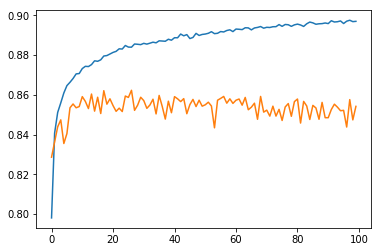

In [58]:
nn7 = Sequential()
nn7.add(Dense(16, input_dim=28**2, activation="relu"))
nn7.add(Dense(num_classes, activation="softmax"))

nn7.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
nn7.summary()

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = (X_train/255).reshape(-1, 28**2)
X_test = (X_test/255).reshape(-1, 28**2)
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

nn7.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

acc7 = nn7.history.history["accuracy"]
vacc7 = nn7.history.history["val_accuracy"]
plt.plot(range(100), acc7, range(100), vacc7)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_22 (Dense)             (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 12s 196us/sample - loss: 0.5073 - accuracy: 0.8205 - val_loss: 0.4383 - val_accuracy: 0.8525
Epoch 2/200
60000/60000 [==============================] - 12s 192us/sample - loss: 0.3898 - accuracy: 0.8651 - val_loss: 0.4261 - val_accuracy: 0.8581
Epoch 3/200
60000/60000 [==============================] - 11s 191us/sample - loss: 0.3653 - accuracy: 0.8768 - val_loss: 0.4038 - val_accuracy: 0.8677
Epo

60000/60000 [==============================] - 10s 160us/sample - loss: 0.2420 - accuracy: 0.9486 - val_loss: 1.2332 - val_accuracy: 0.8776
Epoch 51/200
60000/60000 [==============================] - 10s 160us/sample - loss: 0.2470 - accuracy: 0.9486 - val_loss: 1.1803 - val_accuracy: 0.8794
Epoch 52/200
60000/60000 [==============================] - 10s 160us/sample - loss: 0.2353 - accuracy: 0.9507 - val_loss: 1.1607 - val_accuracy: 0.8882
Epoch 53/200
60000/60000 [==============================] - 10s 160us/sample - loss: 0.2340 - accuracy: 0.9500 - val_loss: 1.2657 - val_accuracy: 0.8862
Epoch 54/200
60000/60000 [==============================] - 10s 160us/sample - loss: 0.2276 - accuracy: 0.9520 - val_loss: 1.1716 - val_accuracy: 0.8849
Epoch 55/200
60000/60000 [==============================] - 10s 160us/sample - loss: 0.2290 - accuracy: 0.9511 - val_loss: 1.2088 - val_accuracy: 0.8753
Epoch 56/200
60000/60000 [==============================] - 10s 160us/sample - loss: 0.2415 - a

60000/60000 [==============================] - 10s 161us/sample - loss: 0.1840 - accuracy: 0.9694 - val_loss: 2.0275 - val_accuracy: 0.8827
Epoch 104/200
60000/60000 [==============================] - 10s 161us/sample - loss: 0.1751 - accuracy: 0.9708 - val_loss: 1.9524 - val_accuracy: 0.8879
Epoch 105/200
60000/60000 [==============================] - 10s 161us/sample - loss: 0.1744 - accuracy: 0.9703 - val_loss: 2.0625 - val_accuracy: 0.8816
Epoch 106/200
60000/60000 [==============================] - 10s 161us/sample - loss: 0.1699 - accuracy: 0.9710 - val_loss: 1.9012 - val_accuracy: 0.8938
Epoch 107/200
60000/60000 [==============================] - 10s 161us/sample - loss: 0.1741 - accuracy: 0.9700 - val_loss: 2.2062 - val_accuracy: 0.8777
Epoch 108/200
60000/60000 [==============================] - 10s 161us/sample - loss: 0.1784 - accuracy: 0.9704 - val_loss: 2.0865 - val_accuracy: 0.8818
Epoch 109/200
60000/60000 [==============================] - 10s 161us/sample - loss: 0.19

60000/60000 [==============================] - 10s 159us/sample - loss: 0.1375 - accuracy: 0.9801 - val_loss: 2.6728 - val_accuracy: 0.8896
Epoch 157/200
60000/60000 [==============================] - 10s 160us/sample - loss: 0.1317 - accuracy: 0.9806 - val_loss: 2.6313 - val_accuracy: 0.8892
Epoch 158/200
60000/60000 [==============================] - 10s 160us/sample - loss: 0.1445 - accuracy: 0.9788 - val_loss: 2.7401 - val_accuracy: 0.8897
Epoch 159/200
60000/60000 [==============================] - 10s 160us/sample - loss: 0.1297 - accuracy: 0.9810 - val_loss: 2.7818 - val_accuracy: 0.8879
Epoch 160/200
60000/60000 [==============================] - 10s 160us/sample - loss: 0.1373 - accuracy: 0.9801 - val_loss: 2.7676 - val_accuracy: 0.8883
Epoch 161/200
60000/60000 [==============================] - 10s 161us/sample - loss: 0.1384 - accuracy: 0.9803 - val_loss: 2.7080 - val_accuracy: 0.8858
Epoch 162/200
60000/60000 [==============================] - 10s 160us/sample - loss: 0.12

ValueError: x and y must have same first dimension, but have shapes (100,) and (200,)

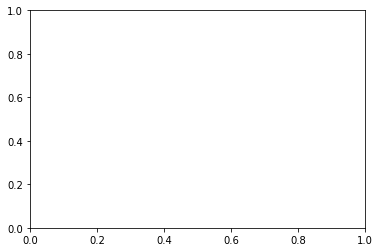

In [59]:
nn0 = Sequential()
nn0.add(Dense(1024, input_dim=28**2, activation="relu"))
nn0.add(Dense(num_classes, activation="softmax"))

nn0.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
nn0.summary()

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = (X_train/255).reshape(-1, 28**2)
X_test = (X_test/255).reshape(-1, 28**2)
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

nn0.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200)

acc0 = nn0.history.history["accuracy"]
vacc0 = nn0.history.history["val_accuracy"]
plt.plot(range(200), acc0, range(200), vacc0)

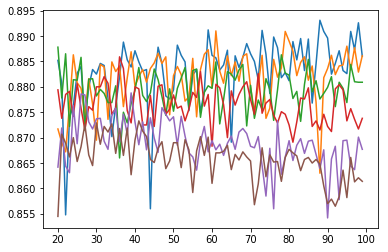

In [70]:
plt.plot(range(100)[20:], vacc0[20:100], range(100)[20:], vacc2[20:], range(100)[20:], vacc3[20:], range(100)[20:], vacc4[20:], range(100)[20:], vacc5[20:], range(100)[20:], vacc6[20:])

In [71]:
nn3.save("nn3.h5")
nn4.save("nn4.h5")
nn5.save("nn5.h5")
nn6.save("nn6.h5")
nn7.save("nn7.h5")
nn0.save("nn0.h5")

In [72]:
nn2d3 = Sequential()
nn2d3.add(Dense(512, input_dim=28**2, activation="relu"))
nn2d3.add(Dropout(0.3))
nn2d3.add(Dense(num_classes, activation="softmax"))

nn2d3.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
nn2d3.summary()

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = (X_train/255).reshape(-1, 28**2)
X_test = (X_test/255).reshape(-1, 28**2)
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

nn2d3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 104us/sample - loss: 0.5375 - accuracy: 0.8108 - val_loss: 0.4258 - val_accuracy: 0.8500
Epoch 2/100
60000/60000 [==============================] - 6s 100us/sample - loss: 0.4257 - accuracy: 0.8539 - val_loss: 0.4413 - val_accuracy: 0.8422
Epoch 3/100
60000/60000 [

Epoch 50/100
60000/60000 [==============================] - 7s 110us/sample - loss: 0.3494 - accuracy: 0.9132 - val_loss: 0.7945 - val_accuracy: 0.8859
Epoch 51/100
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3465 - accuracy: 0.9139 - val_loss: 0.8426 - val_accuracy: 0.8786
Epoch 52/100
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3597 - accuracy: 0.9125 - val_loss: 0.8648 - val_accuracy: 0.8863
Epoch 53/100
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3638 - accuracy: 0.9130 - val_loss: 0.8582 - val_accuracy: 0.8787
Epoch 54/100
60000/60000 [==============================] - 7s 110us/sample - loss: 0.3490 - accuracy: 0.9158 - val_loss: 0.9051 - val_accuracy: 0.8809
Epoch 55/100
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3569 - accuracy: 0.9130 - val_loss: 0.8627 - val_accuracy: 0.8810
Epoch 56/100
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3444 -

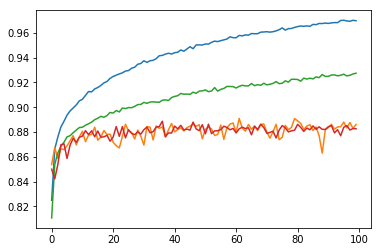

In [74]:
acc2d3 = nn2d3.history.history["accuracy"]
vacc2d3 = nn2d3.history.history["val_accuracy"]
r = range(100)
plt.plot(r, acc2, r, vacc2, r, acc2d3, r, vacc2d3)

In [75]:
nn2d5 = Sequential()
nn2d5.add(Dense(512, input_dim=28**2, activation="relu"))
nn2d5.add(Dropout(0.5))
nn2d5.add(Dense(num_classes, activation="softmax"))

nn2d5.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
nn2d5.summary()

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = (X_train/255).reshape(-1, 28**2)
X_test = (X_test/255).reshape(-1, 28**2)
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

nn2d5.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 111us/sample - loss: 0.5822 - accuracy: 0.7963 - val_loss: 0.4573 - val_accuracy: 0.8399
Epoch 2/100
60000/60000 [==============================] - 6s 103us/sample - loss: 0.4735 - accuracy: 0.8399 - val_loss: 0.4428 - val_accuracy: 0.8545
Epoch 3/100
60000/60000 [

Epoch 50/100
60000/60000 [==============================] - 6s 102us/sample - loss: 0.5018 - accuracy: 0.8837 - val_loss: 0.7935 - val_accuracy: 0.8782
Epoch 51/100
60000/60000 [==============================] - 7s 110us/sample - loss: 0.4939 - accuracy: 0.8851 - val_loss: 0.7814 - val_accuracy: 0.8782
Epoch 52/100
60000/60000 [==============================] - 7s 110us/sample - loss: 0.5084 - accuracy: 0.8842 - val_loss: 0.8042 - val_accuracy: 0.8777
Epoch 53/100
60000/60000 [==============================] - 7s 110us/sample - loss: 0.5015 - accuracy: 0.8876 - val_loss: 0.7812 - val_accuracy: 0.8763
Epoch 54/100
60000/60000 [==============================] - 7s 109us/sample - loss: 0.5020 - accuracy: 0.8851 - val_loss: 0.8349 - val_accuracy: 0.8764
Epoch 55/100
60000/60000 [==============================] - 7s 109us/sample - loss: 0.5044 - accuracy: 0.8861 - val_loss: 0.7967 - val_accuracy: 0.8772
Epoch 56/100
60000/60000 [==============================] - 6s 105us/sample - loss: 0.50

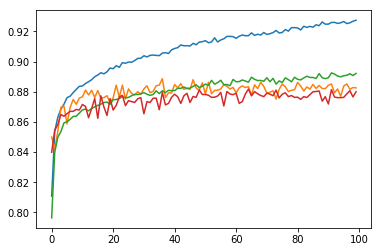

In [78]:
acc2d5 = nn2d5.history.history["accuracy"]
vacc2d5 = nn2d5.history.history["val_accuracy"]
r = range(100)
plt.plot(r, acc2d3, r, vacc2d3, r, acc2d5, r, vacc2d5)

In [84]:
from tensorflow.image import grayscale_to_rgb, resize
from tensorflow.keras.applications import vgg16 as vgg

In [96]:
X_train_rgb = grayscale_to_rgb(X_train.reshape(-1, 28, 28, 1))
X_train_rgb = resize(X_train_rgb, (32, 32)).numpy()
X_test_rgb = grayscale_to_rgb(X_test.reshape(-1, 28, 28, 1))
X_test_rgb = resize(X_test_rgb, (32, 32)).numpy()

In [114]:
base_model = vgg.VGG16(weights='imagenet', 
                       include_top=False, 
                       input_shape=(32, 32, 3))
last = base_model.get_layer('block3_pool').output
x = GlobalAveragePooling2D()(last)
x= BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
pred = Dense(num_classes, activation='softmax')(x)
model = Model(base_model.input, pred)

for layer in base_model.layers:
     layer.trainable = False
        
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

In [117]:
model.fit(X_train_rgb, y_train, validation_data=(X_test_rgb, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.6375 - accuracy: 0.7783 - val_loss: 0.3889 - val_accuracy: 0.8643
Epoch 2/10
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.4133 - accuracy: 0.8531 - val_loss: 0.3442 - val_accuracy: 0.8782
Epoch 3/10
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.3636 - accuracy: 0.8715 - val_loss: 0.3192 - val_accuracy: 0.8862
Epoch 4/10
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.3421 - accuracy: 0.8771 - val_loss: 0.3050 - val_accuracy: 0.8919
Epoch 5/10
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.3215 - accuracy: 0.8855 - val_loss: 0.2916 - val_accuracy: 0.8968
Epoch 6/10
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.3101 - accuracy: 0.8895 - val_loss: 0.2872 - val_accuracy: 0.8984
Epoch 7/10
60000/60000 [==============================] 

In [121]:
base_model = vgg.VGG16(weights='imagenet', 
                       include_top=False, 
                       input_shape=(32, 32, 3))
last = base_model.get_layer('block3_pool').output
x = GlobalAveragePooling2D()(last)
x= BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.6)(x)
pred = Dense(num_classes, activation='softmax')(x)
model = Model(base_model.input, pred)

for layer in base_model.layers:
     layer.trainable = False
        
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

In [122]:
model.fit(X_train_rgb, y_train, validation_data=(X_test_rgb, y_test), epochs=20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.6839 - accuracy: 0.7641 - val_loss: 0.3842 - val_accuracy: 0.8638
Epoch 2/20
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.4179 - accuracy: 0.8547 - val_loss: 0.3330 - val_accuracy: 0.8776
Epoch 3/20
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.3665 - accuracy: 0.8695 - val_loss: 0.3067 - val_accuracy: 0.8879
Epoch 4/20
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.3362 - accuracy: 0.8803 - val_loss: 0.2948 - val_accuracy: 0.8940
Epoch 5/20
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.3145 - accuracy: 0.8876 - val_loss: 0.2807 - val_accuracy: 0.8983
Epoch 6/20
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.3010 - accuracy: 0.8922 - val_loss: 0.2732 - val_accuracy: 0.8999
Epoch 7/20
60000/60000 [==============================] 

In [128]:
nn8 = Sequential()
nn8.add(Dense(256, input_dim=28**2, activation="relu"))
nn8.add(Dropout(0.2))
nn8.add(Dense(128, input_dim=28**2, activation="relu"))
nn8.add(Dropout(0.1))
nn8.add(Dense(num_classes, activation="softmax"))

nn8.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
nn8.summary()

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = (X_train/255).reshape(-1, 28**2)
X_test = (X_test/255).reshape(-1, 28**2)
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

nn8.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 8

KeyboardInterrupt: 

In [129]:
base_model = vgg.VGG16(weights='imagenet', 
                       include_top=False, 
                       input_shape=(32, 32, 3))
last = base_model.get_layer('block3_pool').output
x = GlobalAveragePooling2D()(last)
x= BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
pred = Dense(num_classes, activation='softmax')(x)
model = Model(base_model.input, pred)

for layer in base_model.layers:
     layer.trainable = False
        
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

In [130]:
model.fit(X_train_rgb, y_train, validation_data=(X_test_rgb, y_test), epochs=20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.5700 - accuracy: 0.8016 - val_loss: 0.3555 - val_accuracy: 0.8702
Epoch 2/20
60000/60000 [==============================] - 83s 1ms/sample - loss: 0.3616 - accuracy: 0.8717 - val_loss: 0.3136 - val_accuracy: 0.8874
Epoch 3/20
60000/60000 [==============================] - 85s 1ms/sample - loss: 0.3202 - accuracy: 0.8857 - val_loss: 0.2955 - val_accuracy: 0.8940
Epoch 4/20
60000/60000 [==============================] - 85s 1ms/sample - loss: 0.2966 - accuracy: 0.8944 - val_loss: 0.2815 - val_accuracy: 0.8960
Epoch 5/20
60000/60000 [==============================] - 85s 1ms/sample - loss: 0.2802 - accuracy: 0.8993 - val_loss: 0.2699 - val_accuracy: 0.8999
Epoch 6/20
60000/60000 [==============================] - 85s 1ms/sample - loss: 0.2663 - accuracy: 0.9043 - val_loss: 0.2647 - val_accuracy: 0.9026
Epoch 7/20
60000/60000 [==============================] 

In [131]:
base_model = vgg.VGG16(weights='imagenet', 
                       include_top=False, 
                       input_shape=(32, 32, 3))
last = base_model.get_layer('block3_pool').output
x = GlobalAveragePooling2D()(last)
x= BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
pred = Dense(num_classes, activation='softmax')(x)
model = Model(base_model.input, pred)

for layer in base_model.layers:
     layer.trainable = False
        
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])
model.fit(X_train_rgb, y_train, validation_data=(X_test_rgb, y_test), epochs=20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.5465 - accuracy: 0.8122 - val_loss: 0.3572 - val_accuracy: 0.8732
Epoch 2/20
60000/60000 [==============================] - 83s 1ms/sample - loss: 0.3671 - accuracy: 0.8697 - val_loss: 0.3156 - val_accuracy: 0.8866
Epoch 3/20
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.3274 - accuracy: 0.8828 - val_loss: 0.2972 - val_accuracy: 0.8933
Epoch 4/20
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.3046 - accuracy: 0.8914 - val_loss: 0.2878 - val_accuracy: 0.8967
Epoch 5/20
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.2894 - accuracy: 0.8961 - val_loss: 0.2764 - val_accuracy: 0.9009
Epoch 6/20
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.2775 - accuracy: 0.8982 - val_loss: 0.2709 - val_accuracy: 0.9031
Epoch 7/20
60000/60000 [==============================] 

In [132]:
model.fit(X_train_rgb, y_train, validation_data=(X_test_rgb, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.2069 - accuracy: 0.9258 - val_loss: 0.2355 - val_accuracy: 0.9172
Epoch 2/10
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.2017 - accuracy: 0.9269 - val_loss: 0.2330 - val_accuracy: 0.9156
Epoch 3/10
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.2023 - accuracy: 0.9261 - val_loss: 0.2331 - val_accuracy: 0.9162
Epoch 4/10
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.1989 - accuracy: 0.9269 - val_loss: 0.2307 - val_accuracy: 0.9191
Epoch 5/10
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.1980 - accuracy: 0.9286 - val_loss: 0.2296 - val_accuracy: 0.9195
Epoch 6/10
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.1936 - accuracy: 0.9304 - val_loss: 0.2281 - val_accuracy: 0.9182
Epoch 7/10
60000/60000 [==============================] 

In [133]:
base_model = vgg.VGG16(weights='imagenet', 
                       include_top=False, 
                       input_shape=(32, 32, 3))
last = base_model.get_layer('block3_pool').output
x = GlobalAveragePooling2D()(last)
x= BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
pred = Dense(num_classes, activation='softmax')(x)
model = Model(base_model.input, pred)

for layer in base_model.layers:
     layer.trainable = False
        
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])
model.fit(X_train_rgb, y_train, validation_data=(X_test_rgb, y_test), epochs=30)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.6347 - accuracy: 0.7797 - val_loss: 0.3763 - val_accuracy: 0.8640
Epoch 2/30
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.4084 - accuracy: 0.8558 - val_loss: 0.3330 - val_accuracy: 0.8811
Epoch 3/30
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.3622 - accuracy: 0.8705 - val_loss: 0.3106 - val_accuracy: 0.8898
Epoch 4/30
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.3394 - accuracy: 0.8790 - val_loss: 0.2945 - val_accuracy: 0.8957
Epoch 5/30
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.3212 - accuracy: 0.8854 - val_loss: 0.2873 - val_accuracy: 0.8977
Epoch 6/30
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.3071 - accuracy: 0.8905 - val_loss: 0.2770 - val_accuracy: 0.8995
Epoch 7/30
60000/60000 [==============================] 